# Modelos de Regresión Lineal
## Modelo con datos simulados
Aquí lo que hacemos es asumir que alguien ya ha hecho el modelo predictivo y vamos a analizar qué tan bueno es dicho modelo. Para ello tenemos en cuenta lo siguiente:
* **y** = a + b * x
* **X:** 100 valores distribuidos según una N(1.5, 2.5)
* **Ye:** 5 + 1.9 * x + e
* **e**: estará distribuida según una N(0, 0.8)

In [52]:
import pandas as pd
import numpy as np

In [53]:
x = 1.5 + 2.5 * np.random.randn(100)

In [54]:
res = 0 + 0.8 * np.random.randn(100)

La Y que nos devolvería el modelo:

In [55]:
y_pred = 5 + 1.9 * x

La Y **real**

In [56]:
y_act = 5 + 1.9 * x + res

In [57]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [58]:
data = pd.DataFrame (
    {
        "x":x_list,
        "y":y_act_list,
        "y_pred":y_pred_list
    }
)

In [59]:
data.head()

,x,y,y_pred
0,2.322673,8.900316,9.413078
1,1.131153,8.473190,7.149190
2,-2.144179,0.365196,0.926059
3,-3.990194,-2.930231,-2.581368
4,0.309135,7.922258,5.587357


In [60]:
import matplotlib.pyplot as plt

In [61]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)] # Vector que contiene el promedio las n veces que salga X

Text(0.5, 1.0, 'Valor actual vs Predicción')

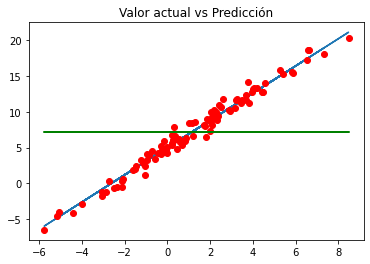

In [62]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x, y_mean, "g")
plt.title("Valor actual vs Predicción")

In [63]:
data["SSR"] = (data["y_pred"] - np.mean(data["y"])) **2
data["SSD"] = (data["y_pred"] - data["y"])**2
data["SST"] = (data["y"] - np.mean(data["y"])) **2

In [64]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,2.322673,8.900316,9.413078,4.759774,0.262925,2.785324
1,1.131153,8.473190,7.149190,0.006756,1.752976,1.542074
2,-2.144179,0.365196,0.926059,39.757164,0.314568,47.144586
3,-3.990194,-2.930231,-2.581368,96.290166,0.121705,103.258483
4,0.309135,7.922258,5.587357,2.702835,5.451764,0.477303


In [65]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [66]:
SSR

2883.4583266623245

In [67]:
SSD

63.25279272399359

In [68]:
SST

3036.6787650131914

In [69]:
SSR + SSD #debería ser igual al SST

2946.711119386318

In [70]:
R2 = SSR / SST
R2

0.9495434156170282

(array([ 2.,  2.,  6., 11., 16., 21., 23., 13.,  2.,  4.]),
 array([-2.33490119, -1.91536376, -1.49582634, -1.07628891, -0.65675149,
        -0.23721406,  0.18232336,  0.60186079,  1.02139821,  1.44093564,
         1.86047306]),
 <BarContainer object of 10 artists>)

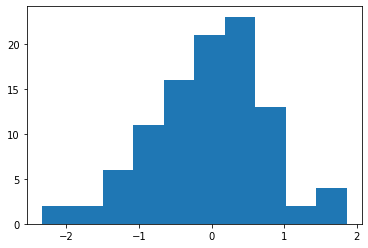

In [71]:
plt.hist(data["y_pred"] - data["y"])

## Conclusión
Podemos afirmar que el modelo explica el 94,95% de Y. Sin embargo queda un 5% que estará explicado por la aleatoriedad u otra vairable

# Obteniendo la recta de regresión
* y = a + b * x
* b = sum((xi-x_m)*(y_-i - y_m)) / sum((xi-x_m)^2)
* a = y_m - b * x_m

In [72]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])
x_mean, y_mean

(1.1502234716868731, 7.231387312421544)

In [73]:
data['beta_n'] = (data['x'] - x_mean) * (data['y'] - y_mean)
data['beta_d'] = (data['x'] - x_mean) **2

In [74]:
beta = sum(data['beta_n']) / sum(data['beta_d'])

In [75]:
alpha = y_mean - beta * x_mean

In [76]:
alpha, beta

(5.011706047623786, 1.9297826200177084)

y = 1.9297826200177084 * x + 5.011706047623786

In [77]:
data['y_model'] = alpha + beta * data['x']
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.322673,8.900316,9.413078,4.759774,0.262925,2.785324,1.956734,1.374637,9.493959
1,1.131153,8.473190,7.149190,0.006756,1.752976,1.542074,-0.023682,0.000364,7.194585
2,-2.144179,0.365196,0.926059,39.757164,0.314568,47.144586,22.620001,10.853091,0.873906
3,-3.990194,-2.930231,-2.581368,96.290166,0.121705,103.258483,52.234956,26.423888,-2.688500
4,0.309135,7.922258,5.587357,2.702835,5.451764,0.477303,-0.581083,0.707429,5.608270


In [79]:
SSR = sum((data["y_model"] - y_mean) **2)
SSD = sum((data["y_model"] - data["y"])**2)
SST = sum((data["y"] - y_mean) **2)

In [80]:
SSR, SSD, SST

(2974.345665150327, 62.333099862861395, 3036.6787650131914)

In [81]:
R2 = SSR / SST
R2

0.9794732651405116

Text(0.5, 1.0, 'Valor actual vs Predicción')

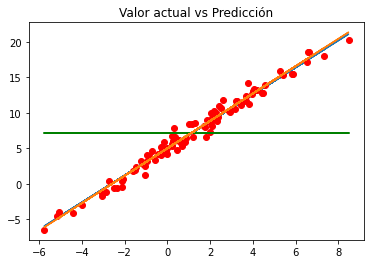

In [83]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)] # Vector que contiene el promedio las n veces que salga X
%matplotlib inline
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'], data['y'], "ro")
plt.plot(data['x'], y_mean, "g")
plt.plot(data['x'], data['y_model'])
plt.title("Valor actual vs Predicción")

# Error estándar de los residuos (RSE)
El RSE se compara contra el promedio de Y. Entrte más pequeño sea, mejor

In [84]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7975287075817101

In [85]:
np.mean(data['y'])

7.231387312421544

In [86]:
RSE / np.mean(data['y'])

0.11028709611664335